# 0. Описание Задачи
### По данным Всемирной организации здравоохранения (ВОЗ), инсульт занимает второе место среди причин смерти в мире, на него приходится около 11% всех смертей. Этот датасет используется для прогнозирования вероятности инсульта у пациента на основе таких входных параметров, как пол, возраст, различные заболевания и статус курения. 
### Данная задача является бинарной задачей классификации

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

# 1. Чтение данных

In [137]:
url = "https://raw.githubusercontent.com/DariaGusarova8192/MachineLearning/main/healthcare-dataset-stroke-data.csv"
data_raw = pd.read_csv(url)

In [138]:
type(data_raw)

pandas.core.frame.DataFrame

In [139]:
data_raw.shape

(5110, 12)

In [140]:
data_raw

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Количество случаев - 5110, количество признаков - 12, количество классов - 2 (был у человека инсульт или нет)
### Признаки:
Id: идентификационный номер пациента

Gender: пол пациента

Age: возраст пациента

Hypertension: есть ли у пациента гипертония

Heart Disease: есть ли у пациента проблемы с сердцем

Ever Married: был ли пациент женат (замужем)

Work Type: тип работы пациента

Residense Type: где проживает пациент

Awd Glucose Level: Общий уровень глюкозы у пациента

BMI: индекс массы тела пациента

Smoking Status: курит ли пациент

Stroke: был ли у пациента инсульт

### Признаки Id, Age, Awd Glucose Level, BMI - числовые признаки

### Признаки Gender, Hypertension, Heart Disease, Ever Married, Stroke, Residense Type - бинарные признаки

### Признаки Work Type, Smoking Status - категориальные признаки

Присвоим категориальный тип столбцам, содержащим категориальные и бинарные нечисловые (для корректного заполнения пропусков) типы:

In [141]:
data_raw['gender'] = data_raw['gender'].astype('category')
data_raw['ever_married'] = data_raw['ever_married'].astype('category')
data_raw['work_type'] = data_raw['work_type'].astype('category')
data_raw['Residence_type'] = data_raw['Residence_type'].astype('category')
data_raw['smoking_status'] = data_raw['smoking_status'].astype('category')

# 2. Визуализация данных и вычисление основных характеристик

In [142]:
data_raw.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [143]:
data_raw.describe(include = ['category'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,3566
unique,2,2,5,2,3
top,Female,Yes,Private,Urban,never smoked
freq,2995,3353,2925,2596,1892


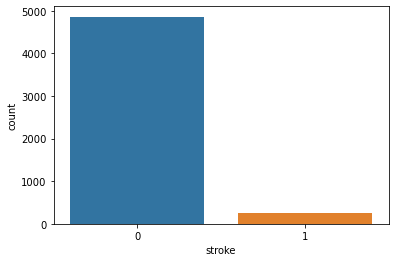

In [144]:
sns.countplot(x = 'stroke', data = data_raw)
pass

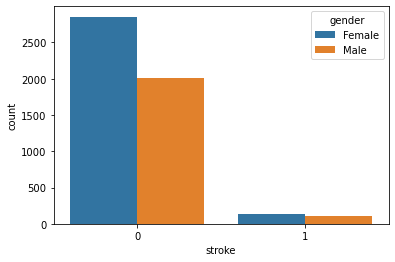

In [145]:
sns.countplot(x = 'stroke', hue = 'gender', data = data_raw)
pass

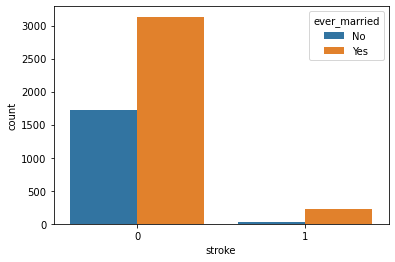

In [146]:
sns.countplot(x = 'stroke', hue = 'ever_married', data = data_raw)
pass

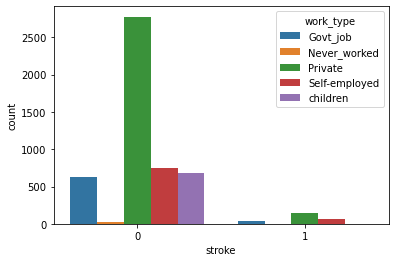

In [147]:
sns.countplot(x = 'stroke', hue = 'work_type', data = data_raw)
pass

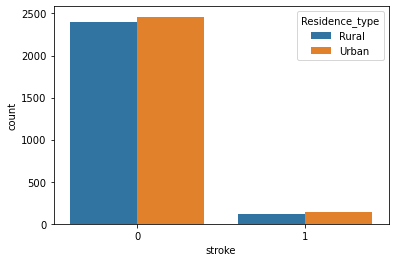

In [148]:
sns.countplot(x = 'stroke', hue = 'Residence_type', data = data_raw)
pass

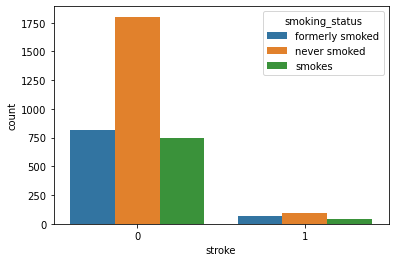

In [149]:
sns.countplot(x = 'stroke', hue = 'smoking_status', data = data_raw)
pass

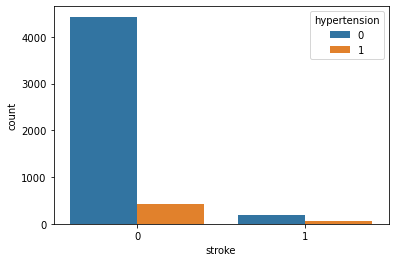

In [150]:
sns.countplot(x = 'stroke', hue = 'hypertension', data = data_raw)
pass

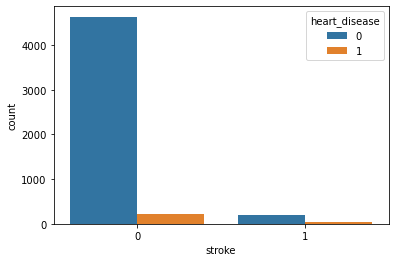

In [151]:
sns.countplot(x = 'stroke', hue = 'heart_disease', data = data_raw)
pass

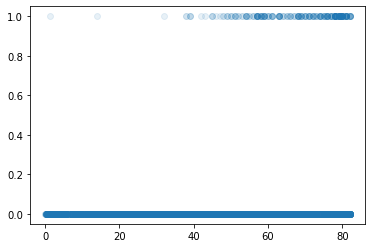

In [152]:
plt.scatter(data_raw['age'], data_raw['stroke'], alpha = 0.1)

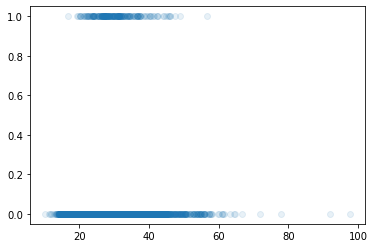

In [153]:
plt.scatter(data_raw['bmi'], data_raw['stroke'], alpha = 0.1)

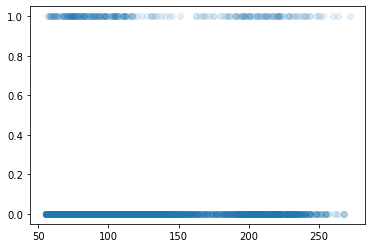

In [154]:
plt.scatter(data_raw['avg_glucose_level'], data_raw['stroke'], alpha = 0.1)

### Матрица корреляции

In [155]:
corr_mat = data_raw.corr()
corr_mat

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


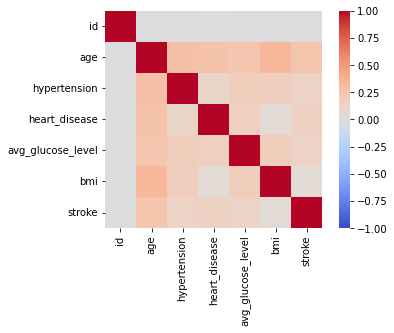

In [156]:
sns.heatmap(corr_mat, square=True, vmin = -1, vmax = 1, cmap ='coolwarm')
pass

Из визуализации данных видно, что наличие у пациента инсульта больше всего зависит от возраста, чуть менее зависит от уровня глюкозы, гипертонии и заболеваний сердца, и меньше всего зависит (но все же зависит!) от индекса массы тела

# 3. Обработка пропущенных значений

### Заполняем пропуски в столбцах с категориальными признаками модой, а с числовыми - медианой

In [157]:
data_raw.isna().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [161]:
data_raw['bmi'].fillna(data_raw['bmi'].median(axis = 0), axis = 0, inplace = True)
data_raw.fillna(data_raw.mode().iloc[0], inplace = True)

In [162]:
data_raw.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# 4. Обработка категориальных признаков

Обработка бинарных признаков:

In [164]:
data_raw['gender'] = pd.factorize(data_raw['gender'])[0]
data_raw['ever_married'] = pd.factorize(data_raw['ever_married'])[0]
data_raw['Residence_type'] = pd.factorize(data_raw['Residence_type'])[0]

Обработка категориальных признаков:

In [165]:
work_type_dummies = pd.get_dummies(data_raw['work_type'])
data_raw = pd.concat((data_raw, work_type_dummies), axis = 1)
data_raw = data_raw.drop(['work_type'], axis = 1)
smoking_status_dummies = pd.get_dummies(data_raw['smoking_status'])
data_raw = pd.concat((data_raw, smoking_status_dummies), axis = 1)
data_raw = data_raw.drop(['smoking_status'], axis = 1)

In [166]:
data_raw

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,9046,0,67.0,0,1,0,0,228.69,36.6,1,0,0,1,0,0,1,0,0
1,51676,1,61.0,0,0,0,1,202.21,28.1,1,0,0,0,1,0,0,1,0
2,31112,0,80.0,0,1,0,1,105.92,32.5,1,0,0,1,0,0,0,1,0
3,60182,1,49.0,0,0,0,0,171.23,34.4,1,0,0,1,0,0,0,0,1
4,1665,1,79.0,1,0,0,1,174.12,24.0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,0,0,83.75,28.1,0,0,0,1,0,0,0,1,0
5106,44873,1,81.0,0,0,0,0,125.20,40.0,0,0,0,0,1,0,0,1,0
5107,19723,1,35.0,0,0,0,1,82.99,30.6,0,0,0,0,1,0,0,1,0
5108,37544,0,51.0,0,0,0,1,166.29,25.6,0,0,0,1,0,0,1,0,0


# 5. Нормализация количественных признаков

In [172]:
data_raw['age'] = (data_raw['age'] - data_raw['age'].mean(axis=0))/data_raw['age'].std(axis=0)
data_raw['avg_glucose_level'] = (data_raw['avg_glucose_level'] - data_raw['avg_glucose_level'].mean(axis=0))/data_raw['avg_glucose_level'].std(axis=0)
data_raw['bmi'] = (data_raw['bmi'] - data_raw['bmi'].mean(axis=0))/data_raw['bmi'].std(axis=0)
data_raw.describe()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
count,5110.000000,5110.000000,5.110000e+03,5110.000000,5110.000000,5110.000000,5110.000000,5.110000e+03,5.110000e+03,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.586106,-1.184745e-15,0.097456,0.054012,0.343836,0.491977,-1.480225e-16,5.311255e-16,0.048728,0.128571,0.004305,0.572407,0.160274,0.134442,0.173190,0.672407,0.154403
std,21161.721625,0.492578,1.000000e+00,0.296607,0.226063,0.475034,0.499985,1.000000e+00,1.000000e+00,0.215320,0.334758,0.065480,0.494778,0.366896,0.341160,0.378448,0.469381,0.361370
min,67.000000,0.000000,-1.908074e+00,0.000000,0.000000,0.000000,0.000000,-1.126848e+00,-2.410791e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,0.000000,-8.060363e-01,0.000000,0.000000,0.000000,0.000000,-6.382598e-01,-6.574445e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36932.000000,1.000000,7.842450e-02,0.000000,0.000000,0.000000,0.000000,-3.149637e-01,-9.897124e-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,54682.000000,1.000000,7.859932e-01,0.000000,0.000000,1.000000,1.000000,1.753909e-01,5.114531e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,72940.000000,1.000000,1.714677e+00,1.000000,1.000000,1.000000,1.000000,3.656787e+00,8.927516e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Построим новую матрицу корреляции, с учетом обработки категориальных и числовых признаков:

In [173]:
corr_mat = data_raw.corr()
corr_mat

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
id,1.000000,-0.001776,0.003538,0.003550,-0.001296,-0.013690,0.001403,0.001092,0.005555,0.006388,-0.000016,0.005459,0.023698,-0.019956,-0.013939,0.007812,-0.007071,0.001004
gender,-0.001776,1.000000,0.027623,-0.021275,-0.085717,-0.029936,-0.005937,-0.054580,0.026310,-0.009117,0.016534,-0.011496,0.032639,0.025971,-0.089283,-0.042738,0.043294,-0.011477
age,0.003538,0.027623,1.000000,0.276398,0.263796,-0.679125,-0.014180,0.238171,0.324296,0.245257,0.130013,-0.078653,0.116534,0.327989,-0.634215,0.236897,-0.247307,0.073133
hypertension,0.003550,-0.021275,0.276398,1.000000,0.108306,-0.164243,0.007913,0.174474,0.158293,0.127904,0.017685,-0.021608,-0.005413,0.115442,-0.129506,0.058853,-0.071503,0.031240
heart_disease,-0.001296,-0.085717,0.263796,0.108306,1.000000,-0.114644,-0.003092,0.161857,0.036916,0.134914,0.001330,-0.015712,0.000027,0.086760,-0.091634,0.066804,-0.087775,0.044049
ever_married,-0.013690,-0.029936,-0.679125,-0.164243,-0.114644,1.000000,0.006261,-0.155068,-0.334911,-0.108340,-0.134041,0.090838,-0.153830,-0.192716,0.544441,-0.171256,0.219091,-0.105226
Residence_type,0.001403,-0.005937,-0.014180,0.007913,-0.003092,0.006261,1.000000,0.004946,0.000277,-0.015458,-0.013131,-0.022859,0.018173,-0.010594,0.002309,-0.007654,0.027163,-0.027266
avg_glucose_level,0.001092,-0.054580,0.238171,0.174474,0.161857,-0.155068,0.004946,1.000000,0.166876,0.131945,0.013845,-0.014675,0.016588,0.062694,-0.102250,0.068111,-0.068501,0.017646
bmi,0.005555,0.026310,0.324296,0.158293,0.036916,-0.334911,0.000277,0.166876,1.000000,0.036110,0.077856,-0.028327,0.203886,0.070160,-0.442102,0.103533,-0.148448,0.084392
stroke,0.006388,-0.009117,0.245257,0.127904,0.134914,-0.108340,-0.015458,0.131945,0.036110,1.000000,0.002677,-0.014882,0.011888,0.062168,-0.083869,0.064556,-0.058931,0.008939


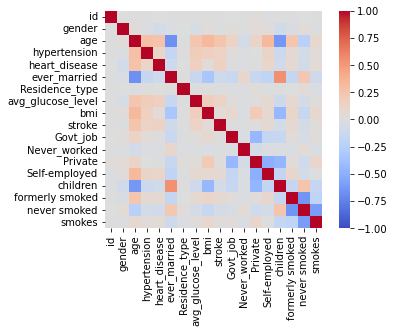

In [176]:
sns.heatmap(corr_mat, square=True, vmin = -1, vmax = 1, cmap ='coolwarm')
pass

Из обновленной матрицы корреляции видно, что наличие инсульта у пациента не зависит от пола и места проживания. Чаще инсульт встречается у самозанятых, а также курящих и куривших прежде

# 6. Разбиение данных на учебную и тестовую выборки

In [252]:
y = data_raw['stroke']
X = data_raw.drop(['stroke'], axis = 1)
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)
X_train.shape, X_test.shape

((3832, 17), (1278, 17))

# 7. Классификатор ближайших соседей

In [253]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier (n_neighbors = 10, p = 1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

# 8. Вычисление ошибки на обучающей и тестовой выборках

In [254]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Вычисление ошибки на обучающей выборке:

In [255]:
np.mean(y_train != y_train_pred)

0.04879958246346555

Вычисление ошибки на тестовой выборке:

In [256]:
np.mean(y_test != y_test_pred)

0.048513302034428794

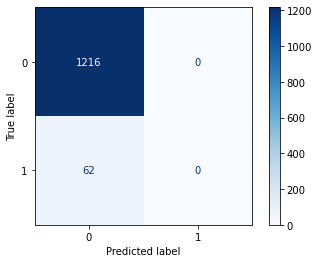

In [257]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap = plt.cm.Blues)
pass

Согласно методу ближайших соседей, 1216 пациентов из тестовой выборки предположительно не имели инсульта и его действительно не было; 0 пациентов из тестовой выборки предположительно имели инсульт и он действительно был; 0 пациентов из тестовой выборки предположительно имели инсульт, но на самом деле его не было; 62 пациента предположительно не имели инсульта, но на самом деле он был.

# 8. Random Forest

In [293]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Ошибка на тренировочной выборке: ', err_train, ' Ошибка на тестовой выборке: ', err_test)

Ошибка на тренировочной выборке:  0.0  Ошибка на тестовой выборке:  0.04929577464788732


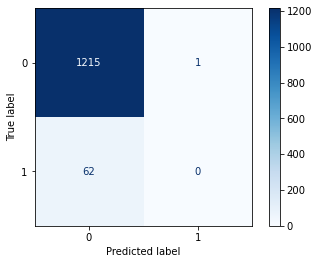

In [291]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test, cmap = plt.cm.Blues)
pass

Согласно методу случайного леса, 1215 пациентов из тестовой выборки предположительно не имели инсульта и его действительно не было; 0 пациентов из тестовой выборки предположительно имели инсульт и он действительно был; 1 пациент из тестовой выборки предположительно имел инсульт, но на самом деле его не было; 62 пациента предположительно не имели инсульта, но на самом деле он был.